# Breadth For Equity Indices

Objective: To analyze how many stocks are above the 10, 20, 50, 100, and 200 simple moving averages to identify the turning points in equity indices

##### Import Packages

In [1]:
import eikon as TR
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

##### Import App Key

In [2]:
TR.set_app_key('AppKey')

##### Pull Price Close and SMA

In [3]:
start_date = '-500'
end_date = '0'
ric='0#.NDX'
Breadth, e= TR.get_data([ric],['TR.closeprice.date','TR.closeprice'],
                       {'SDate':start_date,'EDate':end_date,'Frq':'D'})

##### Moving Averages

In [4]:
SMA = [10,20,50,100,200]

for i in SMA:
    Breadth['SMA_{}'.format(i)] = Breadth['Close Price'].rolling(i).mean()

##### Breadth Count

In [5]:
for i in SMA:
    Breadth['Cbr{}'.format(i)] = np.where(Breadth['Close Price']>Breadth['SMA_{}'.format(i)],1,0)

##### Set Date To Index

In [6]:
Breadth['Date'] = Breadth['Date'].apply(pd.to_datetime)
Breadth.set_index('Date', inplace=True)

##### Today's Breadth

In [7]:
Br_Date = Breadth.groupby(['Date'])
Br_Ratio = (Br_Date.sum()/Br_Date.count()*100)
column_names = ['Cbr10','Cbr20','Cbr50','Cbr100','Cbr200']
Br_Today = Br_Ratio.sort_values(['Date'],ascending=False).head(1).round().reindex(columns=column_names)
Br_Today

,Cbr10,Cbr20,Cbr50,Cbr100,Cbr200
Date,,,,,
2020-06-23 00:00:00+00:00,73.0,65.0,86.0,83.0,75.0


##### Historical Breadth

In [8]:
Hist_Br = Breadth.groupby(['Date']).sum()/Breadth.groupby(['Date']).count()*100

##### Input For Charting

In [9]:
Inst = 'QQQ.O'
Index, e= TR.get_data([Inst],['TR.closeprice.date','TR.closeprice'],
                       {'SDate':start_date,'EDate':end_date,'Frq':'D'})
Index['Date'] = Index['Date'].apply(pd.to_datetime)
Index.set_index('Date', inplace=True)

Text(0.5, 1.0, 'Breadth of the Nasdaq 100')

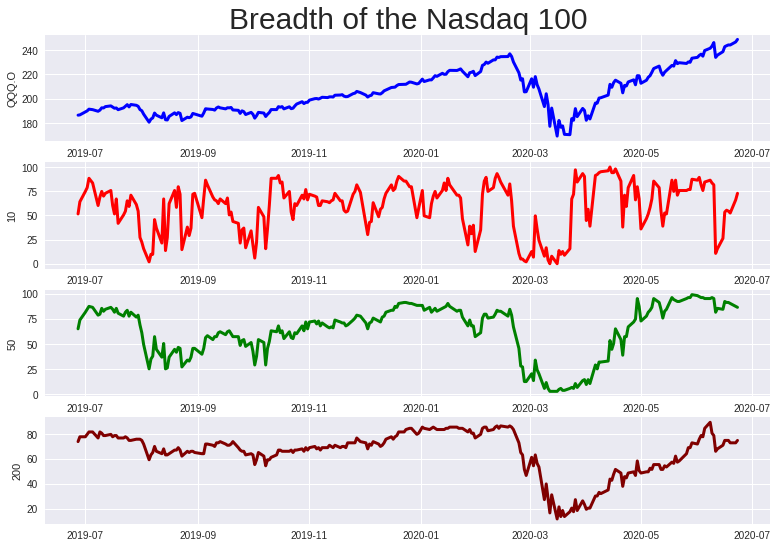

In [12]:
fig = plt.figure(figsize=(13,9))

ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.plot(Index['Close Price'][-250:],c='blue',linewidth=3)
ax1.set_ylabel(Inst)
ax2.plot(Hist_Br['Cbr10'][-250:],c='R',linewidth=3)
ax2.set_ylabel('10')
ax3.plot(Hist_Br['Cbr50'][-250:],c='G',linewidth=3)
ax3.set_ylabel('50')
ax4.plot(Hist_Br['Cbr200'][-250:],c='maroon',linewidth=3)
ax4.set_ylabel('200')

ax1.set_title('Breadth of the Nasdaq 100', size=30)